In [8]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import display
import requests
import json
import os

# Import citipy
from citipy import citipy

# Import API key
from config import weather_api_key


In [9]:
city = citipy.nearest_city(53, -3)
city.city_name

'wrexham'

In [10]:
city = citipy.nearest_city(-41.28, 174.77)
city.city_name

'wellington'

In [54]:
latitudes = np.random.uniform(-90, 90,150)

In [55]:
longitudes = np.random.uniform(-180, 180,150)

In [56]:
latitudes

array([ 12.72356693,  34.57680733,  76.10347367,  35.8604393 ,
        16.76460821,   1.99797498,  60.63816154, -71.07480507,
       -19.70753118, -45.10942893,  83.96334638,  -3.86158442,
       -79.57125192,  57.60613649, -67.2806844 ,  88.03791108,
       -45.80959803,  65.80906312,  25.65221801, -28.98123855,
        66.31851207,  44.04161066,  36.62979068, -17.9636804 ,
       -52.46126197, -22.07666962,  77.21628826,  10.38135226,
       -69.26697703,  50.91092932,   1.80753536,  38.03988359,
        78.94119616, -86.44536783,  -4.23794285, -76.27763782,
        45.5454677 , -13.65355602,  25.07000691,  64.78400448,
       -51.71189005,  50.58799781,   6.25630156,  47.82884459,
       -37.59073146, -41.36176995, -14.45948076,  51.56491036,
       -62.99585445,  77.58600707, -33.38481571,  46.1679387 ,
        69.85531527, -59.48035816,  58.80405324,  49.75887672,
        -1.52887169, -78.62348148,  34.32430159, -76.90534177,
         8.18061963,  -0.40560966,   1.22825012,  81.28

In [57]:
longitudes

array([ 153.17194411,   52.44585126,   99.46245672,   80.79941463,
        165.43142188, -119.32563389, -139.52919414,   97.19716422,
         68.61864444, -149.0555519 ,   52.12928394,  -61.10816073,
       -139.18161332,   70.198773  ,  153.67337649,  -70.60235802,
         76.35650315,  118.95599967,   40.11903487,   48.50005818,
        152.23579181,  -80.03819096,  -82.79857009, -140.79697044,
        -61.81329081,   62.61549117,    7.82890808,   74.55168717,
        134.00017729,   31.93746826,  -24.70523352,  -51.38937043,
        149.96401183,  -19.66258029,  -28.31986639,  108.11046276,
       -153.18072107,   -3.89864982,  103.10864325,  -12.10888548,
          1.29849478,  -59.56921245, -170.51062072, -146.28733013,
        -79.95589768,  -59.00089569, -113.78554281,  -51.08644861,
       -133.84340559,  -69.05629419, -175.0150689 ,   47.72856939,
        124.54907498,  -44.83954191,  -55.97509347,  139.66234845,
       -118.76506593,   97.36931961,  -42.62776303,  135.93732

In [58]:
cities = []
countries = []
for i in range(0,len(latitudes)):
    city = citipy.nearest_city(latitudes[i], longitudes[i])
    current_city = city.city_name.title()
    current_country = city.country_code.upper()
    if current_city not in cities:
        cities.append(current_city)
        countries.append(current_country)
    
    
len(cities)

109

In [63]:
city_index = 0
city_set_index = 0
cities_not_found = 0
city_sets = [cities[i:i + 50] for i in range(0, len(cities), 50)]
country_sets = [countries[i:i + 50] for i in range(0, len(countries), 50)] 

longitude_all = []
latitude_all = []
temperature_max_all = []
humidity_all = []
cloudiness_all = []
wind_speed_all = []
date_all = []

city_all = []
country_all = []

print("Beginning Data Retrieval")     
print("-----------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city_set in city_sets:
    city_index = 0
    for city in city_set:
        print(f"Processing Record {city_index+1} of Set {city_set_index+1} | {city}, {country_sets[city_set_index][city_index]}")
        # response = requests.get(query_url + city + "," + countries[i]).json()
        response = requests.get(query_url + city).json()
        try:
            longitude = response["coord"]["lon"]
            latitude = response["coord"]["lat"]
            temperature_max_F = response["main"]["temp_max"]
            humidity = response["main"]["humidity"]
            cloudiness = response["clouds"]["all"]
            wind_speed = response["wind"]["speed"]
            date = response["dt"]
            
            longitude_all.append(longitude)
            latitude_all.append(latitude)
            temperature_max_all.append(temperature_max_F)
            humidity_all.append(humidity)
            cloudiness_all.append(cloudiness)
            wind_speed_all.append(wind_speed)
            date_all.append(date)
            
            city_all.append(city)
            country_all.append(country_sets[city_set_index][city_index])
            
        except:
            print(f"City not found. Skipping...")
            cities_not_found = cities_not_found + 1
            pass
        city_index = city_index + 1
    city_set_index = city_set_index + 1
                           
print(f"Cities not found = {cities_not_found}")

weather_data_all = pd.DataFrame({
                                    "City" : city_all,
                                    "Lat" : latitude_all,
                                    "Lng" : longitude_all,
                                    "Max Temp" : temperature_max_all,
                                    "Humidity" : humidity_all,
                                    "Cloudiness" : cloudiness_all,
                                    "Wind Speed" : wind_speed_all,
                                    "Country" : country_all
                                })
display(weather_data_all)
weather_data_all.to_csv("../output_data/cities.csv")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Kavieng, PG
Processing Record 2 of Set 1 | Garmsar, IR
Processing Record 3 of Set 1 | Khatanga, RU
Processing Record 4 of Set 1 | Leh, IN
Processing Record 5 of Set 1 | Butaritari, KI
Processing Record 6 of Set 1 | San Patricio, MX
Processing Record 7 of Set 1 | Haines Junction, CA
Processing Record 8 of Set 1 | Albany, AU
Processing Record 9 of Set 1 | Grand River South East, MU
City not found. Skipping...
Processing Record 10 of Set 1 | Mataura, PF
Processing Record 11 of Set 1 | Belushya Guba, RU
City not found. Skipping...
Processing Record 12 of Set 1 | Anori, BR
Processing Record 13 of Set 1 | Rikitea, PF
Processing Record 14 of Set 1 | Vikulovo, RU
Processing Record 15 of Set 1 | Hobart, AU
Processing Record 16 of Set 1 | Qaanaaq, GL
Processing Record 17 of Set 1 | Mahebourg, MU
Processing Record 18 of Set 1 | Nyurba, RU
Processing Record 19 of Set 1 | Umm Lajj, SA
Processing Record 20 of Set 1

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Kavieng,-2.57,150.80,83.66,71,100,6.69,PG
1,Garmsar,35.22,52.34,52.95,34,0,2.01,IR
2,Khatanga,71.97,102.50,3.90,90,15,8.14,RU
3,Leh,34.17,77.58,35.10,64,0,3.58,IN
4,Butaritari,3.07,172.79,82.58,78,13,21.07,KI
...,...,...,...,...,...,...,...,...
92,Saint-Pierre,-21.34,55.48,69.80,68,6,3.36,PM
93,Aripuana,-9.17,-60.63,82.83,55,63,1.57,BR
94,Sulechow,52.08,15.63,45.00,42,93,7.85,PL
95,Sampit,-2.53,112.95,74.57,94,96,2.37,ID


In [67]:
weather_data_all.to_csv("output_data/cities.csv")

In [68]:
summary_weather_statistics = weather_data_all.describe()
summary_weather_statistics

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,17.047835,-1.282680,57.068454,74.690722,53.979381,8.348557
std,38.527500,98.535832,20.833168,16.442679,38.664416,5.037899
min,-54.800000,-175.200000,3.900000,28.000000,0.000000,1.010000
25%,-21.200000,-73.410000,44.600000,67.000000,16.000000,4.700000
50%,22.570000,-24.500000,55.400000,78.000000,65.000000,7.000000
75%,50.960000,77.580000,75.990000,86.000000,90.000000,11.410000
max,77.480000,172.790000,89.600000,100.000000,100.000000,21.070000


In [29]:
A = [[1,2],[3,4],[5,6],[7,8],[9,10]]
A

[[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]

In [30]:
A[1]

[3, 4]

In [31]:
len(A)

5

In [36]:
B=A[1:3]

In [37]:
B

[[3, 4], [5, 6]]

In [43]:
city_sets = [cities[i:i + 50] for i in range(0, len(cities), 50)]  
for city_set in city_sets:
    print(city_set)

['Trairi', 'Mahajanga', 'Port Elizabeth', 'Albany', 'Vestmannaeyjar', 'Ushuaia', 'Krasnoselkup', 'Butaritari', 'Komsomolskiy', 'Hilo', 'Jujuy', 'Atuona', 'Nacajuca', 'Bolshiye Uki', 'Hobart', 'Avarua', 'Port Alfred', 'Griffith', 'Grand River South East', 'Arman', 'Barrow', 'Turtkul', 'Tessalit', 'Hami', 'Tuatapere', 'Evanston', 'Rikitea', 'Pevek', 'Kuche', 'Punta Arenas', 'Matara', 'Moose Factory', 'Sioux Lookout', 'Severo-Kurilsk', 'Norman Wells', 'Thessalon', 'Illoqqortoormiut', 'Mirnyy', 'Mount Gambier', 'Mandali', 'Kyshtovka', 'Ibra', 'Taolanaro', 'Qaanaaq', 'Caravelas', 'Balabac', 'Yellowknife', 'Jamestown', 'Havre', 'Vaini']
['Hermanus', 'Havre-Saint-Pierre', 'Morondava', 'East London', 'Georgetown', 'Alofi', 'Thompson', 'Emerald', 'Kawalu', 'Kodiak', 'Kapaa', 'Amderma', 'Harper', 'Christchurch', 'Bonavista', 'Klokkarvik', 'Tasiilaq', 'Cockburn Town', 'Makurdi', 'Rungata', 'Chalon-Sur-Saone', 'Takoradi', 'Alta Floresta', 'Diffa', 'Kamenskoye', 'Hithadhoo', 'Castro', 'Tahta', 'Arr

In [77]:
weather_data_all.loc[weather_data_all["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [76]:
test_clean = weather_data_all[weather_data_all["Humidity"] <= 100]
test_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Kavieng,-2.57,150.80,83.66,71,100,6.69,PG
1,Garmsar,35.22,52.34,52.95,34,0,2.01,IR
2,Khatanga,71.97,102.50,3.90,90,15,8.14,RU
3,Leh,34.17,77.58,35.10,64,0,3.58,IN
4,Butaritari,3.07,172.79,82.58,78,13,21.07,KI
...,...,...,...,...,...,...,...,...
92,Saint-Pierre,-21.34,55.48,69.80,68,6,3.36,PM
93,Aripuana,-9.17,-60.63,82.83,55,63,1.57,BR
94,Sulechow,52.08,15.63,45.00,42,93,7.85,PL
95,Sampit,-2.53,112.95,74.57,94,96,2.37,ID


In [78]:
x_values = weather_data_all.iloc[:,[1]]
y_values = weather_data_all.iloc[:,[3]]

In [79]:
x_values

,Lat
0,-2.57
1,35.22
2,71.97
3,34.17
4,3.07
...,...
92,-21.34
93,-9.17
94,52.08
95,-2.53


In [80]:
y_values

,Max Temp
0,83.66
1,52.95
2,3.90
3,35.10
4,82.58
...,...
92,69.80
93,82.83
94,45.00
95,74.57


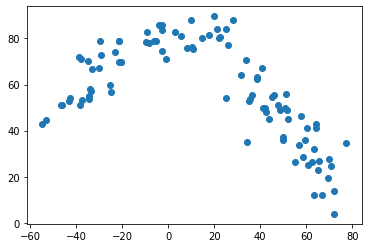

In [81]:
plt.scatter(x_values,y_values)

In [86]:
x_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Lat"]]
y_values = weather_data_all.loc[weather_data_all["Lat"] >= 0,["Max Temp"]]

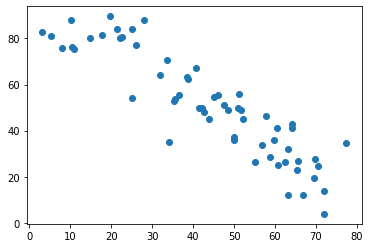

In [87]:
plt.scatter(x_values,y_values)

In [88]:
x_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Lat"]]
y_values = weather_data_all.loc[weather_data_all["Lat"] < 0,["Max Temp"]]

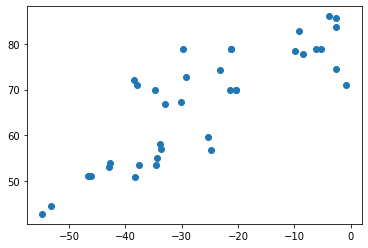

In [89]:
plt.scatter(x_values,y_values)

In [91]:
?linregress

In [92]:
CEND      = '\33[0m'
CBOLD     = '\33[1m'
CITALIC   = '\33[3m'
CURL      = '\33[4m'
CBLINK    = '\33[5m'
CBLINK2   = '\33[6m'
CSELECTED = '\33[7m'

CBLACK  = '\33[30m'
CRED    = '\33[31m'
CGREEN  = '\33[32m'
CYELLOW = '\33[33m'
CBLUE   = '\33[34m'
CVIOLET = '\33[35m'
CBEIGE  = '\33[36m'
CWHITE  = '\33[37m'

CBLACKBG  = '\33[40m'
CREDBG    = '\33[41m'
CGREENBG  = '\33[42m'
CYELLOWBG = '\33[43m'
CBLUEBG   = '\33[44m'
CVIOLETBG = '\33[45m'
CBEIGEBG  = '\33[46m'
CWHITEBG  = '\33[47m'

CGREY    = '\33[90m'
CRED2    = '\33[91m'
CGREEN2  = '\33[92m'
CYELLOW2 = '\33[93m'
CBLUE2   = '\33[94m'
CVIOLET2 = '\33[95m'
CBEIGE2  = '\33[96m'
CWHITE2  = '\33[97m'

CGREYBG    = '\33[100m'
CREDBG2    = '\33[101m'
CGREENBG2  = '\33[102m'
CYELLOWBG2 = '\33[103m'
CBLUEBG2   = '\33[104m'
CVIOLETBG2 = '\33[105m'
CBEIGEBG2  = '\33[106m'
CWHITEBG2  = '\33[107m'

In [93]:
x = 0
for i in range(24):
  colors = ""
  for j in range(5):
    code = str(x+j)
    colors = colors + "\33[" + code + "m\\33[" + code + "m\033[0m "
  print(colors)
  x=x+5

\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
\33 \33 \33 \33 \33 
